# Librería científica en Python - Pandas

In [16]:
import pandas as pd
print(pd.__version__)

import numpy as np

0.23.0


## Estructura de datos

Pandas tiene tres estructuras de datos:
- series
- dataframes
- panel (antiguamente)

`Series` vector unidimensional, etiquetas en los ejes y datos homogéneos


In [4]:
print(pd.Series([1, 1, 2, 4, 5]))

0    1
1    1
2    2
3    4
4    5
dtype: int64


In [6]:
s = pd.Series([1, 1, 2, 4, 5])
type(s)

pandas.core.series.Series

In [8]:
s2 = pd.Series([1, 1, 2, 4, 5.])
s2

0    1.0
1    1.0
2    2.0
3    4.0
4    5.0
dtype: float64

In [17]:
s3 = pd.Series([1.2, 1, "char", 4., 5, True])
s3

0     1.2
1       1
2    char
3       4
4       5
5    True
dtype: object

In [19]:
s4 = pd.Series({
    "alice" : 2,
    "bob" : 3,
    "mario": 5
})
print(s4)
print(type(s4))

alice    2
bob      3
mario    5
dtype: int64
<class 'pandas.core.series.Series'>


In [22]:
# Para extraer el valor de un parámetro (key)
print(s4['alice'])

2


In [28]:
s4.keys()

Index(['alice', 'bob', 'mario'], dtype='object')

In [30]:
s4.values()

TypeError: 'numpy.ndarray' object is not callable

In [31]:
# creamos una serie etiquetada a partir de dos vectores
s5 = pd.Series(
    [2, 3, 5],
    index = ['alice', 'mario', 'bob'])
print(s5)

alice    2
mario    3
bob      5
dtype: int64


## Creamos un dataframe

un dataframe es una tabla bidimensional con etiquetas en los ejes y datos heterogéneos

In [33]:
df = pd.DataFrame(
    [1, 2, 4],
    [3, 5, 8])
# data = [1, 2, 4], index = [3, 5, 8]
print(df)

   0
3  1
5  2
8  4


In [36]:
df2 = pd.DataFrame([
    [1, 4, 5, 6, 8],
    [6, 0, 1, 8, True],
    ["Hola", 1.2, 1.0]
])
df2

,0,1,2,3,4
0,1,4.0,5.0,6.0,8
1,6,0.0,1.0,8.0,True
2,Hola,1.2,1.0,NaN,None


In [37]:
# Alternativa de configurar las etiquetas con el uso de `diccionarios`
df3 = {'alice': [1980, 1, 1],
      'bob': [1981, 30, 7],
      'mario': [1984, 4, 30]}
print(pd.DataFrame(data = df3, 
                  index = ["anyo", "mes", "dia"]))

      alice   bob  mario
anyo   1980  1981   1984
mes       1    30      4
dia       1     7     30


In [38]:
# Alternativa de configurar las etiquetas con el uso de `listas`
df4 = [[1981,4,30],
      [1982, 7, 8],
      [1985, 6, 7]]

print(pd.DataFrame(
        data = df4,
        columns = ["anyo","mes","dia"],
        index = ["alice", "bob", "mario"]
))

       anyo  mes  dia
alice  1981    4   30
bob    1982    7    8
mario  1985    6    7


In [40]:
# Alternativa de configurar las etiquetas con el uso de `listas` también con datos heterogéneos
df5 = [[1981,4,30, "Economicas"],
      [1982, 7, 8, "Psicologia"],
      [1985, 6, 7, "Matematica"]]

print(pd.DataFrame(
        data = df5,
        columns = ["anyo","mes","dia","Uni"],
        index = ["alice", "bob", "mario"]
))

       anyo  mes  dia         Uni
alice  1981    4   30  Economicas
bob    1982    7    8  Psicologia
mario  1985    6    7  Matematica


## Paneles

son series tridimensionales que funciona en versiones anteriores de Pandas

In [41]:
img = [[[0, 0, 0], [0, 15, 0], [0, 0, 15], [15, 0, 0], [180, 180, 180]],
       [[200, 200, 200], [125, 1, 125], [100, 100, 2], [1, 152, 125], [15, 25, 20]]]

# Utilizamos números para indexar filas y columnas, y las letras
# "R", "G", "B" para indicar el contenido de este color en cada píxel
index = pd.MultiIndex.from_product(
    [range(len(img)), range(len(img[0])), ["R", "G", "B"]], 
    names=['row', 'column', 'color'])

# Creamos la serie con el índice multidimensional especificando los datos
# y los índices
s = pd.Series([x for row in img for col in row for x in col], 
               index=index)
s

row  column  color
0    0       R          0
             G          0
             B          0
     1       R          0
             G         15
             B          0
     2       R          0
             G          0
             B         15
     3       R         15
             G          0
             B          0
     4       R        180
             G        180
             B        180
1    0       R        200
             G        200
             B        200
     1       R        125
             G          1
             B        125
     2       R        100
             G        100
             B          2
     3       R          1
             G        152
             B        125
     4       R         15
             G         25
             B         20
dtype: int64

## Visualización gráfica con pandas. Imágen de 2 filas y 5 columnas

Populating the interactive namespace from numpy and matplotlib


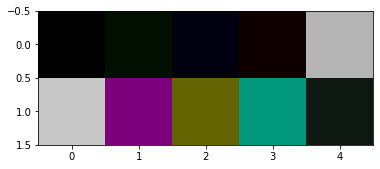

In [42]:
%pylab inline
from pylab import imshow
imshow(array(img, dtype = uint16), interpolation = "nearest")

## Tratar datos en Pandas

In [45]:
# cargar un dataset
data = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/comic-characters/marvel-wikia-data.csv")

# mostramos las n primeras filas
data.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0


In [47]:
data.head(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0
5,2458,Benjamin Grimm (Earth-616),\/Benjamin_Grimm_(Earth-616),Public Identity,Good Characters,Blue Eyes,No Hair,Male Characters,NaN,Living Characters,2255.0,Nov-61,1961.0
6,2166,Reed Richards (Earth-616),\/Reed_Richards_(Earth-616),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2072.0,Nov-61,1961.0
7,1833,Hulk (Robert Bruce Banner),\/Hulk_(Robert_Bruce_Banner),Public Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,2017.0,May-62,1962.0
8,29481,Scott Summers (Earth-616),\/Scott_Summers_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1955.0,Sep-63,1963.0
9,1837,Jonathan Storm (Earth-616),\/Jonathan_Storm_(Earth-616),Public Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,1934.0,Nov-61,1961.0


In [48]:
# mostramos las últimas filas 
data.tail(10)

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year
16366,643435,Karen (Hijack's girlfriend) (Earth-616),\/Karen_(Hijack%27s_girlfriend)_(Earth-616),Public Identity,Neutral Characters,Brown Eyes,Black Hair,Female Characters,NaN,Living Characters,NaN,NaN,NaN
16367,694583,Marcus (Kate Bishop's neighbor) (Earth-616),\/Marcus_(Kate_Bishop%27s_neighbor)_(Earth-616),Public Identity,Good Characters,Hazel Eyes,Bald,Male Characters,Homosexual Characters,Living Characters,NaN,NaN,NaN
16368,703892,Marcy (Offer's employee) (Earth-616),\/Marcy_(Offer%27s_employee)_(Earth-616),Public Identity,Neutral Characters,NaN,Brown Hair,Female Characters,NaN,Living Characters,NaN,NaN,NaN
16369,660799,Melanie Kapoor (Earth-616),\/Melanie_Kapoor_(Earth-616),Public Identity,Good Characters,Blue Eyes,Black Hair,Female Characters,NaN,Living Characters,NaN,NaN,NaN
16370,674414,Phoenix's Shadow (Earth-616),\/Phoenix%27s_Shadow_(Earth-616),NaN,Neutral Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN
16371,657508,Ru'ach (Earth-616),\/Ru%27ach_(Earth-616),No Dual Identity,Bad Characters,Green Eyes,No Hair,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16372,665474,Thane (Thanos' son) (Earth-616),\/Thane_(Thanos%27_son)_(Earth-616),No Dual Identity,Good Characters,Blue Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16373,695217,Tinkerer (Skrull) (Earth-616),\/Tinkerer_(Skrull)_(Earth-616),Secret Identity,Bad Characters,Black Eyes,Bald,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16374,708811,TK421 (Spiderling) (Earth-616),\/TK421_(Spiderling)_(Earth-616),Secret Identity,Neutral Characters,NaN,NaN,Male Characters,NaN,Living Characters,NaN,NaN,NaN
16375,673702,Yologarch (Earth-616),\/Yologarch_(Earth-616),NaN,Bad Characters,NaN,NaN,NaN,NaN,Living Characters,NaN,NaN,NaN


In [50]:
type(data)

pandas.core.frame.DataFrame

In [52]:
# mostrar las etiquetas
data.index

RangeIndex(start=0, stop=16376, step=1)

In [53]:
# mostrar las estadísticas básica, pandas solo mostrará de los valores numéricos
data.describe()

,page_id,APPEARANCES,Year
count,16376.000000,15280.000000,15561.000000
mean,300232.082377,17.033377,1984.951803
std,253460.403399,96.372959,19.663571
min,1025.000000,1.000000,1939.000000
25%,28309.500000,1.000000,1974.000000
50%,282578.000000,3.000000,1990.000000
75%,509077.000000,8.000000,2000.000000
max,755278.000000,4043.000000,2013.000000


### Indexación y selección de datos

Podemos utilizar las expresiones habituales de Python (y NumPy) para seleccionar datos de dataframes o bien usar los operadores propios de pandas. Estos últimos están optimizados, por lo que su uso es recomendado para trabajar con conjuntos de datos grandes o en situaciones donde la eficiencia sea crítica.

In [54]:
# Seleccionamos los nombres de los diez primeros personajes, es decir, mostramos la columna "name" de las diez primeras filas
# usando expresiones Python.
data["name"][0:10]

0              Spider-Man (Peter Parker)
1        Captain America (Steven Rogers)
2    Wolverine (James \"Logan\" Howlett)
3      Iron Man (Anthony \"Tony\" Stark)
4                    Thor (Thor Odinson)
5             Benjamin Grimm (Earth-616)
6              Reed Richards (Earth-616)
7             Hulk (Robert Bruce Banner)
8              Scott Summers (Earth-616)
9             Jonathan Storm (Earth-616)
Name: name, dtype: object

In [55]:
# Seleccionamos el nombre, el estado de identidad y el color de pelo de los superhéroes 3 y 8
# usando el operador de acceso de pandas .loc
data.loc[[3,8], ["name", "ID", "HAIR"]]

,name,ID,HAIR
3,"Iron Man (Anthony \""Tony\"" Stark)",Public Identity,Black Hair
8,Scott Summers (Earth-616),Public Identity,Brown Hair


In [56]:
# Seleccionamos filas según el género del superhéroe utilizando operadores binarios y expresiones Python.
male = data[data.SEX == "Male Characters"]
female = data[data.SEX == "Female Characters"]
print(len(male))
print(len(female))


11638
3837


In [57]:
# Combinamos operadores binarios para seleccionar los superhéroes con identidad secreta que han aparecido más
# de dos mil veces con expresiones Python.
secret_and_popular1 = data[(data.APPEARANCES > 1000) & (data.ID == "Secret Identity")]
print(len(secret_and_popular1))
print(secret_and_popular1["name"])


5
0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object


In [58]:
# Utilizamos el método 'where' de pandas para obtener la misma información:
secret_and_popular2 = data.where((data.APPEARANCES > 1000) & (data.ID == "Secret Identity"))
# Notad que en este caso el resultado tiene el mismo tamaño que el 'dataframe' original: los valores no seleccionados
# muestran NaN.
print(len(secret_and_popular2))
print(secret_and_popular2["name"][0:10])

16376
0    Spider-Man (Peter Parker)
1                          NaN
2                          NaN
3                          NaN
4                          NaN
5                          NaN
6                          NaN
7                          NaN
8                          NaN
9                          NaN
Name: name, dtype: object


In [59]:
# Podemos eliminar las filas que tengan todos los valores NaN, obteniendo así el mismo resultado que usando 
# operadores binarios. 
print(secret_and_popular2.dropna(how="all")["name"])

0      Spider-Man (Peter Parker)
19      Robert Drake (Earth-616)
23    Piotr Rasputin (Earth-616)
29       Kurt Wagner (Earth-616)
30            Vision (Earth-616)
Name: name, dtype: object


## Agregación de datos
Pandas también permite crear grupos de datos a partir de los valores de una o más columnas y luego operar sobre los grupos creados. Veamos algunos ejemplos.

In [60]:
# Agrupamos el 'dataframe' en función de la alineación del superhéroe.
grouped = data.groupby("ALIGN")

# Visualizamos el nombre y el número de filas de cada grupo. 
for name, group in grouped:
    print(name, len(group))
    

Bad Characters 6720
Good Characters 4636
Neutral Characters 2208


In [61]:
# Agrupamos el 'dataframe' en función de la alineación del superhéroe y de la ocultación de su identidad.
grouped = data.groupby(["ALIGN", "ID"])

# Visualizamos el nombre y el número de filas de cada grupo.
for name, group in grouped:
    print(name, len(group))

('Bad Characters', 'Known to Authorities Identity') 3
('Bad Characters', 'No Dual Identity') 474
('Bad Characters', 'Public Identity') 1452
('Bad Characters', 'Secret Identity') 3223
('Good Characters', 'Known to Authorities Identity') 10
('Good Characters', 'No Dual Identity') 647
('Good Characters', 'Public Identity') 1628
('Good Characters', 'Secret Identity') 1613
('Neutral Characters', 'Known to Authorities Identity') 2
('Neutral Characters', 'No Dual Identity') 390
('Neutral Characters', 'Public Identity') 706
('Neutral Characters', 'Secret Identity') 818


In [62]:
# A partir de los datos agrupados, aplicamos la función de agregación np.mean (que calcula la media).
grouped.aggregate(np.mean)

page_id  APPEARANCES  \
ALIGN              ID                                                          
Bad Characters     Known to Authorities Identity   20762.666667    11.666667   
                   No Dual Identity               420196.056962    10.434211   
                   Public Identity                364450.002066    10.846815   
                   Secret Identity                272270.281415     8.895082   
Good Characters    Known to Authorities Identity   67293.700000    72.000000   
                   No Dual Identity               351762.737249    41.811570   
                   Public Identity                328621.391892    42.761401   
                   Secret Identity                209598.569746    37.098220   
Neutral Characters Known to Authorities Identity   25164.000000   180.500000   
                   No Dual Identity               448877.128205    24.430481   
                   Public Identity                405297.841360    22.266165   
                   Secret Identity                255694.179707    19.737113   

                                                         Year  
ALIGN              ID                                          
Bad Characters     Known to Authorities Identity  1991.666667  
                   No Dual Identity               1973.530806  
                   Public Identity                1973.381458  
                   Secret Identity                1984.200065  
Good Characters    Known to Authorities Identity  1994.100000  
                   No Dual Identity               1981.512195  
                   Public Identity                1982.214422  
                   Secret Identity                1990.303430  
Neutral Characters Known to Authorities Identity  1988.500000  
                   No Dual Identity               1983.160237  
                   Public Identity                1987.366322  
                   Secret Identity                1992.339818

In [ ]:
### Recuperamos la información de un único grupo de interés.
grouped.get_group(("Neutral Characters", "Known to Authorities Identity"))

## Escritura de datos a un fichero
De un modo análogo a cómo hemos cargado los datos de un fichero a un dataframe, podemos escribir los datos de un dataframe en un fichero CSV.

In [64]:
# Creamos un 'dataframe' con los nombres de los superhéroes.
new_dataset = data[["name"]]
# Guardamos el nuevo 'dataframe' en un fichero, forzando la codificación a 'utf-8'.
new_dataset.to_csv("marvel-wikia-data-reduced.csv", encoding='utf-8')